In [1]:
%matplotlib inline
import collections
import gym
import matplotlib.pyplot as plot
import numpy as np
import torch as t

In [2]:
env = gym.make('CartPole-v1')

(500.0,
 array([0.22082737, 0.21853197, 0.43218107, 0.35700644]),
 0.5244282191945463)

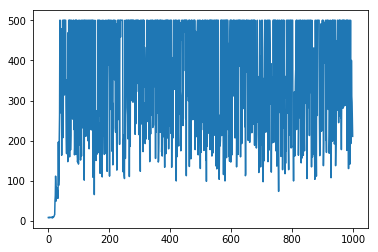

In [68]:
best = (float('-inf'), np.zeros(env.observation_space.shape[0]), np.random.random_sample())
lr = 0.1
rh = []

for _ in range(1000):
    rewards, weights, bias = 0, np.random.random_sample(best[1].shape), np.random.random_sample()
    weights = best[1] * (1 - lr) + weights * lr
    bias = best[2] * (1 - lr) + bias * lr

    ob = env.reset()
    while True:
        action = 0 if np.sum(weights * ob)  + bias < .5 else 1
        ob, reward, done, info = env.step(action)
        rewards += reward
        if done:
            break
    
    rh.append(rewards)
    if rewards > best[0]:
        best = (rewards, weights, bias)

plot.plot(rh)
best

In [4]:
env.close()